<a href="https://colab.research.google.com/github/RobertCH37/projekt_zaliczenowy/blob/main/projekt_zaliczeniowy_Robert_Che%C5%82stowski_grupa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
tweety = pd.read_csv("/content/twitery.csv")

In [ ]:
tweety_temp = tweety.head()

In [ ]:
#1.1
tweety["DNi_TYGODNIA"] = [elem.replace("Mon", "Poniedziałek").replace("Tue", "Wtorek").replace("Wed", "Środa").replace("Thu", "Czwartek").replace("Fri", "Piątek").replace("Sat", "Sobota").replace("Sun", "Niedziela") for elem in tweety["created_at"]]

In [ ]:
#1.2
tweety["miesiace"] = [elem.replace("Jan", "01").replace("Feb", "02").replace("Mar", "03").replace("Apr", "04").replace("May", "05").replace("Jun", "06").replace("Jul", "07").replace("Aug", "08").replace("Sep", "09").replace("Oct", "10").replace("Nov", "11").replace("Dec", "12") for elem in tweety["created_at"]]

In [ ]:
#1.3
lista = tweety["tweet_url"]
lista = [elem for elem in lista if not(pd.isnull(elem)) == True]
print(lista)

#1.4
lista2 = tweety["urls"]
lista2 = [elem for elem in lista2 if not(pd.isnull(elem)) == True]
print(lista2)

#1.5
lista3 = tweety["media"]
lista3 = [elem for elem in lista3 if not(pd.isnull(elem)) == True]
print(lista3)

['https://twitter.com/Bartek93794875/status/1394697302728749068', 'https://twitter.com/TVN24BiS/status/1394978896660078595', 'https://twitter.com/Magdaiks/status/1394710981184475136', 'https://twitter.com/KrzysztofKando1/status/1394741976038350849', 'https://twitter.com/KKStrojek/status/1394883858701639684', 'https://twitter.com/niewidzialni_eu/status/1394905467760091137', 'https://twitter.com/ZStolicy/status/1394975959833534464', 'https://twitter.com/iwantaxiong/status/1394992908474978310', 'https://twitter.com/RMF24pl/status/1394965467001937923', 'https://twitter.com/PrawoPLserwis/status/1394888074686078978', 'https://twitter.com/jobpoland/status/1394782429290934273', 'https://twitter.com/BizblogPl/status/1394981108069109766', 'https://twitter.com/marychlak/status/1395008369203765253', 'https://twitter.com/Dariusz_Jaqub/status/1394738302213890049', 'https://twitter.com/StarostwoZywiec/status/1394931180378677248', 'https://twitter.com/DziennikPL/status/1394966077105483779', 'https://t

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#1.6 - stopwords angielskie
stop = set(stopwords.words("english"))
tweety['text_without_stopwords'] = tweety['text'].apply(lambda x: ' '.join([elem for elem in x.split() if elem not in (stop)]))

In [ ]:
#1.6 - stopowords polskie
with open("stopwordspolish.txt", "r") as f:
  new_stopwords = []
  for line in f.readlines():
    new_stopwords.append(line)

new_stopwords_set = set(new_stopwords)
polskie_stopwords = [elem.replace("\n", "") for elem in new_stopwords_set]
tweety['text_without_stopwords_polskie'] = tweety['text'].apply(lambda x: ' '.join([elem for elem in x.split() if elem.lower() not in (polskie_stopwords)]))

In [ ]:
#2.1
tweety["polubienia_sortowanie"] = pd.to_numeric(tweety["favorite_count"])
tweety.nlargest(n=5, columns="polubienia_sortowanie")

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,DNi_TYGODNIA,miesiace,text_without_stopwords,text_without_stopwords_polskie,polubienia_sortowanie
452,NaN,Thu May 13 10:46:18 +0000 2021,NaN,https://twitter.com/Brzosti/status/13927933165...,NaN,481,1392793316509552648,NaN,NaN,NaN,...,Brzosti,29759,NaN,http://instagram.com/brzosti99,False,Czwartek May 13 10:46:18 +0000 2021,Thu 05 13 10:46:18 +0000 2021,"Kochani, mamy to! Udało mi się załatwić sesję ...","Kochani, mamy to! Udało załatwić sesję zdalną ...",481
477,NaN,Thu May 13 09:35:24 +0000 2021,NaN,NaN,https://twitter.com/Alarm_szkolny/status/13914...,377,1392775475332845568,NaN,NaN,NaN,...,PBasiukiewicz,9114,NaN,http://trzyfilary.org,False,Czwartek May 13 09:35:24 +0000 2021,Thu 05 13 09:35:24 +0000 2021,Zdalna szkoła nie zastąpi interakcji z nauczyc...,Zdalna szkoła zastąpi interakcji nauczycielem ...,377
400,NaN,Thu May 13 22:34:44 +0000 2021,NaN,NaN,NaN,178,1392971603038855170,NaN,NaN,NaN,...,Brzosti,29759,NaN,http://instagram.com/brzosti99,False,Czwartek May 13 22:34:44 +0000 2021,Thu 05 13 22:34:44 +0000 2021,"InPost zaliczył u mnie mocnego plusika, bo ofe...","InPost zaliczył mocnego plusika, oferuje praco...",178
215,NaN,Mon May 17 08:35:08 +0000 2021,NaN,NaN,NaN,152,1394209861349560321,NaN,NaN,NaN,...,Brzosti,29759,NaN,http://instagram.com/brzosti99,False,Poniedziałek May 17 08:35:08 +0000 2021,Mon 05 17 08:35:08 +0000 2021,"Kocham pracę zdalną, bo mogę siedzieć w krótki...","Kocham pracę zdalną, mogę siedzieć krótkich sp...",152
164,NaN,Tue May 18 11:24:42 +0000 2021,NaN,https://twitter.com/BettyElaWhite/status/13946...,NaN,77,1394614919782359040,NaN,NaN,NaN,...,BettyElaWhite,180654,NaN,https://ow.org.pl,False,Wtorek May 18 11:24:42 +0000 2021,Tue 05 18 11:24:42 +0000 2021,"Gdy dziecko zdalną plastykę, zapomnieliście wz...","dziecko zdalną plastykę, zapomnieliście wziąć ...",77


In [ ]:
#2.2
tweety.nlargest(n=5, columns="retweet_count")

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,DNi_TYGODNIA,miesiace,text_without_stopwords,text_without_stopwords_polskie,polubienia_sortowanie
336,NaN,Fri May 14 20:02:18 +0000 2021,NaN,NaN,NaN,0,1393295626423648257,NaN,NaN,NaN,...,Iza03217914,5397,NaN,NaN,False,Piątek May 14 20:02:18 +0000 2021,Fri 05 14 20:02:18 +0000 2021,Zdalna szkoła nie zastąpi interakcji z nauczyc...,Zdalna szkoła zastąpi interakcji nauczycielem ...,0
354,NaN,Thu May 13 12:29:19 +0000 2021,NaN,NaN,NaN,0,1392819242500825094,NaN,NaN,NaN,...,Daisy_betty_,17063,NaN,NaN,False,Czwartek May 13 12:29:19 +0000 2021,Thu 05 13 12:29:19 +0000 2021,Zdalna szkoła nie zastąpi interakcji z nauczyc...,Zdalna szkoła zastąpi interakcji nauczycielem ...,0
357,NaN,Thu May 13 12:17:12 +0000 2021,NaN,NaN,NaN,0,1392816195099893766,NaN,NaN,NaN,...,PiotrGralski2,9523,NaN,NaN,False,Czwartek May 13 12:17:12 +0000 2021,Thu 05 13 12:17:12 +0000 2021,Zdalna szkoła nie zastąpi interakcji z nauczyc...,Zdalna szkoła zastąpi interakcji nauczycielem ...,0
360,NaN,Fri May 14 05:28:10 +0000 2021,NaN,NaN,NaN,0,1393075645912125441,NaN,NaN,NaN,...,PiotrRSzymanski,144068,NaN,NaN,False,Piątek May 14 05:28:10 +0000 2021,Fri 05 14 05:28:10 +0000 2021,Zdalna szkoła nie zastąpi interakcji z nauczyc...,Zdalna szkoła zastąpi interakcji nauczycielem ...,0
366,NaN,Thu May 13 20:37:44 +0000 2021,NaN,NaN,NaN,0,1392942156294262786,NaN,NaN,NaN,...,Filovera77,67344,NaN,https://opowiesciwedrowne.pl/,False,Czwartek May 13 20:37:44 +0000 2021,Thu 05 13 20:37:44 +0000 2021,Zdalna szkoła nie zastąpi interakcji z nauczyc...,Zdalna szkoła zastąpi interakcji nauczycielem ...,0


In [ ]:
#2.3
tweety["possibly_sensitive2"] = tweety["possibly_sensitive"].astype(str)
tweety[tweety.possibly_sensitive2.str.contains('False')]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_statuses_count,user_time_zone,user_urls,user_verified,DNi_TYGODNIA,miesiace,text_without_stopwords,text_without_stopwords_polskie,polubienia_sortowanie,possibly_sensitive2
1,NaN,Wed May 19 11:31:01 +0000 2021,NaN,NaN,https://tvn24.pl/biznes/z-kraju/praca-zdalna-w...,2,1394978896660078595,NaN,NaN,NaN,...,76428,NaN,http://tvn24bis.pl/,True,Środa May 19 11:31:01 +0000 2021,Wed 05 19 11:31:01 +0000 2021,Rozpoczynamy ustawowe konsultacje przepisów re...,Rozpoczynamy ustawowe konsultacje przepisów re...,2,False
5,NaN,Wed May 19 06:39:14 +0000 2021,NaN,NaN,http://m.in http://niewidzialni.eu/Profilaktyk...,0,1394905467760091137,NaN,NaN,NaN,...,6831,NaN,http://www.niewidzialni.eu,False,Środa May 19 06:39:14 +0000 2021,Wed 05 19 06:39:14 +0000 2021,"Pandemia, praca zdalna lockdowny spowodowały, ...","Pandemia, praca zdalna lockdowny spowodowały, ...",0,False
8,NaN,Wed May 19 10:37:39 +0000 2021,NaN,NaN,http://www.rmf24.pl/ekonomia/news-praca-zdalna...,4,1394965467001937923,NaN,NaN,NaN,...,195526,NaN,http://www.rmf24.pl,False,Środa May 19 10:37:39 +0000 2021,Wed 05 19 10:37:39 +0000 2021,Praca zdalna po epidemii? Szef będzie musiał z...,Praca zdalna epidemii? Szef musiał zapłacić pr...,4,False
9,NaN,Wed May 19 05:30:07 +0000 2021,UE pracazdalna,NaN,https://www.prawo.pl/kadry/praca-zdalna-w-epid...,0,1394888074686078978,NaN,NaN,NaN,...,13886,NaN,http://Prawo.pl,False,Środa May 19 05:30:07 +0000 2021,Wed 05 19 05:30:07 +0000 2021,"Pandemia sprawiła, że biura opustoszały, miejs...","Pandemia sprawiła, biura opustoszały, miejscem...",0,False
10,NaN,Tue May 18 22:30:19 +0000 2021,NaN,NaN,https://poland.jobrat.net/2021/05/19/asystentk...,0,1394782429290934273,NaN,NaN,NaN,...,61688,NaN,http://poland.berardi.tv,False,Wtorek May 18 22:30:19 +0000 2021,Tue 05 18 22:30:19 +0000 2021,"Asystentka (praca zdalna), Warszawa - https://...","Asystentka (praca zdalna), Warszawa - https://...",0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,NaN,Thu May 13 08:12:49 +0000 2021,NaN,NaN,https://alleopole.pl/ogloszenie/33049/asystent...,0,1392754691264634881,NaN,NaN,NaN,...,40975,NaN,NaN,False,Czwartek May 13 08:12:49 +0000 2021,Thu 05 13 08:12:49 +0000 2021,Asystent w Dziale Spedycji Morskiej - osoba z ...,Asystent Dziale Spedycji Morskiej - osoba orze...,0,False
471,NaN,Thu May 13 08:17:48 +0000 2021,NaN,NaN,https://alleopole.pl/ogloszenie/33381/analityk...,0,1392755946569482241,NaN,NaN,NaN,...,40975,NaN,NaN,False,Czwartek May 13 08:17:48 +0000 2021,Thu 05 13 08:17:48 +0000 2021,Analityk ze znajomością języka angielskiego – ...,Analityk znajomością języka angielskiego – pra...,0,False
473,NaN,Thu May 13 08:12:37 +0000 2021,NaN,NaN,https://alleopole.pl/ogloszenie/33050/asystent...,0,1392754642451369986,NaN,NaN,NaN,...,40975,NaN,NaN,False,Czwartek May 13 08:12:37 +0000 2021,Thu 05 13 08:12:37 +0000 2021,Asystent w Dziale Finansowym – praca zdalna - ...,Asystent Dziale Finansowym – praca zdalna - Da...,0,False
477,NaN,Thu May 13 09:35:24 +0000 2021,NaN,NaN,https://twitter.com/Alarm_szkolny/status/13914...,377,1392775475332845568,NaN,NaN,NaN,...,9114,NaN,http://trzyfilary.org,False,Czwartek May 13 09:35:24 +0000 2021,Thu 05 13 09:35:24 +0000 2021,Zdalna szkoła nie zastąpi interakcji z nauczyc...,Zdalna szkoła zastąpi interakcji nauczycielem ...,377,False


In [ ]:
#2.4
tweety["user_created_at"] =  pd.to_datetime(tweety["user_created_at"])
tweety.nsmallest(n=1, columns="user_created_at")

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_statuses_count,user_time_zone,user_urls,user_verified,DNi_TYGODNIA,miesiace,text_without_stopwords,text_without_stopwords_polskie,polubienia_sortowanie,possibly_sensitive2
365,NaN,Thu May 13 12:08:27 +0000 2021,NaN,NaN,NaN,0,1392813992859549697,antybodys,1.392813e+18,2.264811e+09,...,46677,NaN,NaN,False,Czwartek May 13 12:08:27 +0000 2021,Thu 05 13 12:08:27 +0000 2021,@antybodys @leweserce @Filaczynska Przecież od...,@antybodys @leweserce @Filaczynska nauka zdaln...,0,nan


In [ ]:
#2.5
tweety["user_followers_count"] = tweety["user_followers_count"].astype(int)
tweety.nlargest(n=1, columns="user_followers_count")

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_statuses_count,user_time_zone,user_urls,user_verified,DNi_TYGODNIA,miesiace,text_without_stopwords,text_without_stopwords_polskie,polubienia_sortowanie,possibly_sensitive2
458,NaN,Thu May 13 06:56:19 +0000 2021,wyborcza,NaN,"https://poznan.wyborcza.pl/poznan/7,36001,2707...",1,1392735438725652482,NaN,NaN,NaN,...,236146,NaN,http://www.wyborcza.pl,True,Czwartek May 13 06:56:19 +0000 2021,Thu 05 13 06:56:19 +0000 2021,"Szkolna przemoc też może być zdalna. Tyle, że ...","Szkolna przemoc zdalna. Tyle, trudniej zauważy...",1,False


In [ ]:
#2.6
tweety["user_verified"] = tweety["user_verified"].astype(str)
tweety[tweety.user_verified.str.contains("True")]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_statuses_count,user_time_zone,user_urls,user_verified,DNi_TYGODNIA,miesiace,text_without_stopwords,text_without_stopwords_polskie,polubienia_sortowanie,possibly_sensitive2
1,NaN,Wed May 19 11:31:01 +0000 2021,NaN,NaN,https://tvn24.pl/biznes/z-kraju/praca-zdalna-w...,2,1394978896660078595,NaN,NaN,NaN,...,76428,NaN,http://tvn24bis.pl/,True,Środa May 19 11:31:01 +0000 2021,Wed 05 19 11:31:01 +0000 2021,Rozpoczynamy ustawowe konsultacje przepisów re...,Rozpoczynamy ustawowe konsultacje przepisów re...,2,False
15,NaN,Wed May 19 10:40:04 +0000 2021,NaN,NaN,https://gospodarka.dziennik.pl/praca/artykuly/...,1,1394966077105483779,NaN,NaN,NaN,...,189030,NaN,http://www.dziennik.pl,True,Środa May 19 10:40:04 +0000 2021,Wed 05 19 10:40:04 +0000 2021,Pracodawca zwróci za prąd? Szykują się zmiany ...,Pracodawca zwróci prąd? Szykują zmiany pracy z...,1,False
31,NaN,Wed May 19 10:39:33 +0000 2021,NaN,https://twitter.com/BIPolska/status/1394965947...,http://dlvr.it/RzyX2l,1,1394965947736281088,NaN,NaN,NaN,...,80819,NaN,http://www.businessinsider.com.pl,True,Środa May 19 10:39:33 +0000 2021,Wed 05 19 10:39:33 +0000 2021,Rząd ureguluje pracę zdalną. Będzie możliwość ...,Rząd ureguluje pracę zdalną. możliwość pracy d...,1,False
35,NaN,Wed May 19 11:03:05 +0000 2021,NaN,NaN,"https://forsal.pl/praca/artykuly/8167245,micha...",1,1394971869992865805,NaN,NaN,NaN,...,130475,NaN,http://www.forsal.pl,True,Środa May 19 11:03:05 +0000 2021,Wed 05 19 11:03:05 +0000 2021,Michałek: Ministerstwo prowadzi konsultacje do...,Michałek: Ministerstwo prowadzi konsultacje do...,1,False
81,NaN,Tue May 18 16:35:52 +0000 2021,OCoChodzi wieszwięcej,NaN,https://www.tvp.info/53869719/nauka-stacjonarn...,59,1394693226825764873,NaN,NaN,NaN,...,328583,NaN,NaN,True,Wtorek May 18 16:35:52 +0000 2021,Tue 05 18 16:35:52 +0000 2021,[WIDEO] @CzarnekP: Nasza młodzież musi wiedzie...,"[WIDEO] @CzarnekP: młodzież wiedzieć, Polska w...",59,False
99,NaN,Tue May 18 10:07:00 +0000 2021,MowiaPrezydenci,NaN,https://podcasty.rp.pl/audycje/mowia-prezydenc...,9,1394595366192836614,NaN,NaN,NaN,...,259051,NaN,http://www.rp.pl,True,Wtorek May 18 10:07:00 +0000 2021,Tue 05 18 10:07:00 +0000 2021,🎧#MowiaPrezydenci: Jaki obraz ochrony zdrowia ...,🎧#MowiaPrezydenci: obraz ochrony zdrowia wyłan...,9,False
159,NaN,Tue May 18 08:20:03 +0000 2021,NaN,NaN,https://forsal.pl/praca/aktualnosci/artykuly/8...,0,1394568451830603776,NaN,NaN,NaN,...,130475,NaN,http://www.forsal.pl,True,Wtorek May 18 08:20:03 +0000 2021,Tue 05 18 08:20:03 +0000 2021,Europejczycy na home office. Jak Polska wypada...,Europejczycy home office. Polska wypada tle UE...,0,False
161,NaN,Tue May 18 10:22:40 +0000 2021,MowiaPrezydenci,NaN,NaN,0,1394599308046094341,NaN,NaN,NaN,...,46807,NaN,NaN,True,Wtorek May 18 10:22:40 +0000 2021,Tue 05 18 10:22:40 +0000 2021,🎧#MowiaPrezydenci: Jaki obraz ochrony zdrowia ...,🎧#MowiaPrezydenci: obraz ochrony zdrowia wyłan...,0,nan
191,NaN,Mon May 17 05:05:28 +0000 2021,wieszwięcej,NaN,https://www.tvp.info/53844517/nauka-zdalna-sta...,3,1394157094677491714,NaN,NaN,NaN,...,328584,NaN,NaN,True,Poniedziałek May 17 05:05:28 +0000 2021,Mon 05 17 05:05:28 +0000 2021,Powrót szkół. Nowe rozporządzenie #wieszwięcej...,Powrót szkół. Nowe rozporządzenie #wieszwięcej...,3,False
218,NaN,Mon May 17 08:06:33 +0000 2021,NaN,NaN,https://gospodarka.dziennik.pl/praca/artykuly/...,1,1394202666834698250,NaN,NaN,NaN,...,189030,NaN,http://www.dziennik.pl,True,Poniedziałek May 17 08:06:33 +0000 2021,Mon 05 17 08:06:33 +0000 2021,Pół-turyści tworzą nowe trendy. Po pandemii ni...,Pół-turyści tworzą nowe trendy. pandemii wrócą...,1,False


In [ ]:
#2.7
regex = r"^(\w+)"
tweety["data"] = tweety["created_at"].str.extract(regex, expand=False)
tweety["data"].value_counts().idxmax()

'Thu'

In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-09 17:58:35.487237: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/pl_core_news_sm-3.5.0/pl_core_news_sm-3.5.0-py3-none-any.whl (20.2 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load("pl_core_news_sm")
nlp.pipeline

tweety["text_spacy"] = tweety["text"].apply(nlp)

doc = tweety["text_spacy"]
doc1 = ''.join(str(x) for x in doc)
text = nlp(doc1)

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'pl_core_news_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
for ent in text.ents:
  print(ent.text, ent.label_) 

In [ ]:
#3.1
osoby = [ent.text for ent in text.ents if ent.label_ == "persName"]
tweety["persons"] = pd.Series(osoby)
tweety["persons"]

0                     Iwona Michałek
1      https://t.co/hnPZd1vUMZ[WIDEO
2                           Grodzkim
3                           Grodzkim
4                           Grodzkim
                   ...              
478                              NaN
479                              NaN
480                              NaN
481                              NaN
482                              NaN
Name: persons, Length: 483, dtype: object

In [ ]:
#3.2
miejsca = [ent.text for ent in text.ents if ent.label_ == "placeName"]
tweety["places"] = pd.Series(miejsca)
tweety["places"]

0      Polska
1      Polski
2      Polska
3      Polski
4      Polska
        ...  
478       NaN
479       NaN
480       NaN
481       NaN
482       NaN
Name: places, Length: 483, dtype: object

In [ ]:
#3.3
organizacje = [ent.text for ent in text.ents if ent.label_ == "orgName"]
tweety["organizations"] = pd.Series(organizacje)
tweety["organizations"]

0                                                     UE
1             https://t.co/N0bMBg5jPx@OrdoMedicus Zdalna
2                                                     uł
3      @michal_kolanko\n\nhttps://t.co/7DI5qVHwtpOsta...
4        PCS Paruch Chruściel Schiffter | Littler Global
                             ...                        
478                                                  NaN
479                                                  NaN
480                                                  NaN
481                                                  NaN
482                                                  NaN
Name: organizations, Length: 483, dtype: object

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("classic")

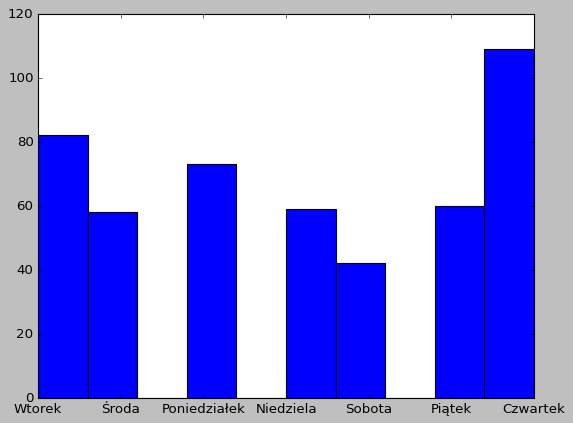

In [ ]:
#4.1
tweety["DNi_TYGODNIA"]
tweety["dni"] = tweety["DNi_TYGODNIA"].str.extract(regex, expand=False)
plt.hist(tweety["dni"])
plt.show()